<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Copy_of_DATA_205_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 

In [ ]:
# check working directory
os.getcwd()

'C:\\Users\\Valued Customer\\Desktop\\jj\\MC\\DATA 205\\Datasets'

In [ ]:
# change working directory
os.chdir('/Users/Valued Customer/Desktop/jj/MC/DATA 205/Datasets')

In [ ]:
# check new working directory
os.getcwd()

'C:\\Users\\Valued Customer\\Desktop\\jj\\MC\\DATA 205\\Datasets'

In [ ]:
# read Correctional Facility Average Daily Population dataset of from a CSV and store the results in a DataFrame
df_1 = pd.read_csv("Correctional_Facility_Average_Daily_Population.csv", index_col=False)
head = df_1.head(10)
print(head)

        Month/Year Detention Services and Community Corrections  \
0   1/01/2016 0:00                                         PRRS   
1   2/01/2017 0:00                                         MCCF   
2   2/01/2017 0:00                                         PTSU   
3   2/01/2017 0:00                                         PRRS   
4   2/01/2017 0:00                                          ACS   
5   9/01/2015 0:00                                          ACS   
6  11/01/2015 0:00                                         PTSU   
7   2/01/2017 0:00                                         MCDC   
8   2/01/2017 0:00                                         IPSA   
9   3/01/2017 0:00                                         MCCF   

  Detention Services and Community Corrections Names  \
0                  Pre-Release and Re-Entry Services   
1            Montgomery County Correctional Facility   
2                         Pre-Trial Supervision Unit   
3                  Pre-Release and Re-

Note:  Montgomery County Correctional Facility (MCFF) custody of pre-trial status or serving up to 18 months.  Montgomery County Detention Center (MCDC) is where initial intake screenings occur prior to transfer to the Correctional facility.

In [ ]:
# Remove "0:00" from Month/Year column
df_1['Month/Year'].str.rstrip('0:00')

0       1/01/2016 
1       2/01/2017 
2       2/01/2017 
3       2/01/2017 
4       2/01/2017 
          ...     
427    12/01/2020 
428    12/01/2020 
429    12/01/2020 
430    12/01/2020 
431    12/01/2020 
Name: Month/Year, Length: 432, dtype: object

In [ ]:
# check dataframe type
type(df_1)

pandas.core.frame.DataFrame

In [ ]:
# Change column names with rename() function
df_1 = df_1.rename(columns = {"Month/Year": "Date", "Detention Services and Community Corrections":"DSCC Abbr.", "Detention Services and Community Corrections Names":"DSCC Names", "Average Daily Population" : "Avg. Daily Pop."})

In [ ]:
# Checking column name change
df_1.head(1)

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,1/01/2016 0:00,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124


In [ ]:
# the 0:00 that was previously stripped was added back in.  Will try to strip again.
df_1['Date'].str.rstrip('0:00')

0       1/01/2016 
1       2/01/2017 
2       2/01/2017 
3       2/01/2017 
4       2/01/2017 
          ...     
427    12/01/2020 
428    12/01/2020 
429    12/01/2020 
430    12/01/2020 
431    12/01/2020 
Name: Date, Length: 432, dtype: object

In [ ]:
# Checking second strip
df_1.head(1)

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,1/01/2016 0:00,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124


In [ ]:
# Checking data types for each column
print(df_1.dtypes)

Date               object
DSCC Abbr.         object
DSCC Names         object
Category           object
Avg. Daily Pop.     int64
dtype: object


In [ ]:
#Checking Shape
print(df_1.shape)

(432, 5)


In [ ]:
# Describe
df_1.describe()

,Avg. Daily Pop.
count,432.000000
mean,376.178241
std,290.277686
min,0.000000
25%,108.000000
50%,256.500000
75%,628.250000
max,1025.000000


In [ ]:
df_1["DSCC Names"].value_counts()

Alternative Community Services                72
Montgomery County Detention Center            72
Pre-Trial Supervision Unit                    72
Montgomery County Correctional Facility       72
Pre-Release and Re-Entry Services             72
Intervention Program for Substance Abusers    72
Name: DSCC Names, dtype: int64

In [ ]:
# Check null 
df_1.isnull()

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
427,False,False,False,False,False
428,False,False,False,False,False
429,False,False,False,False,False
430,False,False,False,False,False


In [ ]:
# Null sum
df_1.isnull().sum()

Date               0
DSCC Abbr.         0
DSCC Names         0
Category           0
Avg. Daily Pop.    0
dtype: int64

In [ ]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [ ]:
# group by Month/Year
df_1_time = df_1.groupby('Date')

In [ ]:
df_1_time.head(5)

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,1/01/2016 0:00,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124
1,2/01/2017 0:00,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508
2,2/01/2017 0:00,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707
3,2/01/2017 0:00,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129
4,2/01/2017 0:00,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731
...,...,...,...,...,...
426,12/01/2020 0:00,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,47
427,12/01/2020 0:00,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
428,12/01/2020 0:00,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,69
429,12/01/2020 0:00,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,514


In [ ]:
# Arrange by DSCC Abbreviation
df_1_abbr = df_1.groupby('DSCC Abbr.')

In [ ]:
# 
df_1_abbr.head()

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,1/01/2016 0:00,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124
1,2/01/2017 0:00,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508
2,2/01/2017 0:00,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707
3,2/01/2017 0:00,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129
4,2/01/2017 0:00,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731
5,9/01/2015 0:00,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,703
6,11/01/2015 0:00,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,655
7,2/01/2017 0:00,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,59
8,2/01/2017 0:00,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,156
9,3/01/2017 0:00,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,563


In [ ]:
# Arrange by DSCC Abbreviation then by sort by Date
df_1_abbr2 = df_1.groupby('DSCC Abbr.').apply(lambda x: x.sort_values('Date'))

In [ ]:
df_1_abbr2.head(30)

Date DSCC Abbr.                      DSCC Names  \
DSCC Abbr.                                                                   
ACS        19    1/01/2015 0:00        ACS  Alternative Community Services   
           209   1/01/2016 0:00        ACS  Alternative Community Services   
           388   1/01/2017 0:00        ACS  Alternative Community Services   
           155   1/01/2018 0:00        ACS  Alternative Community Services   
           82    1/01/2019 0:00        ACS  Alternative Community Services   
           188   1/01/2020 0:00        ACS  Alternative Community Services   
           271  10/01/2015 0:00        ACS  Alternative Community Services   
           298  10/01/2016 0:00        ACS  Alternative Community Services   
           124  10/01/2017 0:00        ACS  Alternative Community Services   
           326  10/01/2018 0:00        ACS  Alternative Community Services   
           395  10/01/2019 0:00        ACS  Alternative Community Services   
           312  10/01/2020 0:00        ACS  Alternative Community Services   
           142  11/01/2015 0:00        ACS  Alternative Community Services   
           335  11/01/2016 0:00        ACS  Alternative Community Services   
           132  11/01/2017 0:00        ACS  Alternative Community Services   
           66   11/01/2018 0:00        ACS  Alternative Community Services   
           173  11/01/2019 0:00        ACS  Alternative Community Services   
           425  11/01/2020 0:00        ACS  Alternative Community Services   
           163  12/01/2015 0:00        ACS  Alternative Community Services   
           292  12/01/2016 0:00        ACS  Alternative Community Services   
           141  12/01/2017 0:00        ACS  Alternative Community Services   
           76   12/01/2018 0:00        ACS  Alternative Community Services   
           181  12/01/2019 0:00        ACS  Alternative Community Services   
           430  12/01/2020 0:00        ACS  Alternative Community Services   
           149   2/01/2015 0:00        ACS  Alternative Community Services   
           357   2/01/2016 0:00        ACS  Alternative Community Services   
           4     2/01/2017 0:00        ACS  Alternative Community Services   
           148   2/01/2018 0:00        ACS  Alternative Community Services   
           90    2/01/2019 0:00        ACS  Alternative Community Services   
           199   2/01/2020 0:00        ACS  Alternative Community Services   

                                                         Category  \
DSCC Abbr.                                                          
ACS        19   Criminal Justice Clients under Pre-Trial Services   
           209  Criminal Justice Clients under Pre-Trial Services   
           388  Criminal Justice Clients under Pre-Trial Services   
           155  Criminal Justice Clients under Pre-Trial Services   
           82   Criminal Justice Clients under Pre-Trial Services   
           188  Criminal Justice Clients under Pre-Trial Services   
           271  Criminal Justice Clients under Pre-Trial Services   
           298  Criminal Justice Clients under Pre-Trial Services   
           124  Criminal Justice Clients under Pre-Trial Services   
           326  Criminal Justice Clients under Pre-Trial Services   
           395  Criminal Justice Clients under Pre-Trial Services   
           312  Criminal Justice Clients under Pre-Trial Services   
           142  Criminal Justice Clients under Pre-Trial Services   
           335  Criminal Justice Clients under Pre-Trial Services   
           132  Criminal Justice Clients under Pre-Trial Services   
           66   Criminal Justice Clients under Pre-Trial Services   
           173  Criminal Justice Clients under Pre-Trial Services   
           425  Criminal Justice Clients under Pre-Trial Services   
           163  Criminal Justice Clients under Pre-Trial Services   
           292  Criminal Justice Clients under Pre-Trial Services   
           1

In [ ]:
# Simplify name
df_2 = df_1_abbr2

In [ ]:
# Dates
# GB = df_1_abbr2.groupby([(df_1_abbr2.index.year), (df_1_abbr2.index.month)]).sum()

In [ ]:
# Dates attempt 2
#df_2['Year']= df_2['Date'].apply(lambda x: getYear(x))
#df_2['Month']= df_2['Date'].apply(lambda x: getMonth(x))
#df_2['Day']= df_2['Date'].apply(lambda x: getDay(x))
#df_2['YearMonth']= df_2['Date'].apply(lambda x: getYearMonth(x))

In [ ]:
# Create separate columns for month day and year 
df_2.Date = pd.to_datetime(df_2.Date)


In [ ]:
df_2[['month', 'year']] = df_2.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_2

Date DSCC Abbr.                      DSCC Names  \
DSCC Abbr.                                                             
ACS        19  2015-01-01        ACS  Alternative Community Services   
           209 2016-01-01        ACS  Alternative Community Services   
           388 2017-01-01        ACS  Alternative Community Services   
           155 2018-01-01        ACS  Alternative Community Services   
           82  2019-01-01        ACS  Alternative Community Services   
...                   ...        ...                             ...   
PTSU       157 2016-09-01       PTSU      Pre-Trial Supervision Unit   
           115 2017-09-01       PTSU      Pre-Trial Supervision Unit   
           269 2018-09-01       PTSU      Pre-Trial Supervision Unit   
           361 2019-09-01       PTSU      Pre-Trial Supervision Unit   
           418 2020-09-01       PTSU      Pre-Trial Supervision Unit   

                                                         Category  \
DSCC Abbr.                                                          
ACS        19   Criminal Justice Clients under Pre-Trial Services   
           209  Criminal Justice Clients under Pre-Trial Services   
           388  Criminal Justice Clients under Pre-Trial Services   
           155  Criminal Justice Clients under Pre-Trial Services   
           82   Criminal Justice Clients under Pre-Trial Services   
...                                                           ...   
PTSU       157  Criminal Justice Clients under Pre-Trial Services   
           115  Criminal Justice Clients under Pre-Trial Services   
           269  Criminal Justice Clients under Pre-Trial Services   
           361  Criminal Justice Clients under Pre-Trial Services   
           418  Criminal Justice Clients under Pre-Trial Services   

                Avg. Daily Pop. month   year  
DSCC Abbr.                                    
ACS        19               721    01   2015  
           209              814    01   2016  
           388              700    01   2017  
           155              655    01   2018  
           82               564    01   2019  
...                         ...   ...    ...  
PTSU       157              697    09   2016  
           115              753    09   2017  
           269              770    09   2018  
           361              662    09   2019  
           418              930    09   2020  

[432 rows x 7 columns]

In [ ]:
#df_2['month'], df_2['day'], df_2['year'] = df_2.Date.dt.month, df_2.Date.dt.day, df_2.Date.dt.year
#df_

In [ ]:
df_2.groupby(df_2['year'])
df_2.head(10)

Date DSCC Abbr.                      DSCC Names  \
DSCC Abbr.                                                             
ACS        19  2015-01-01        ACS  Alternative Community Services   
           209 2016-01-01        ACS  Alternative Community Services   
           388 2017-01-01        ACS  Alternative Community Services   
           155 2018-01-01        ACS  Alternative Community Services   
           82  2019-01-01        ACS  Alternative Community Services   
           188 2020-01-01        ACS  Alternative Community Services   
           271 2015-10-01        ACS  Alternative Community Services   
           298 2016-10-01        ACS  Alternative Community Services   
           124 2017-10-01        ACS  Alternative Community Services   
           326 2018-10-01        ACS  Alternative Community Services   

                                                         Category  \
DSCC Abbr.                                                          
ACS        19   Criminal Justice Clients under Pre-Trial Services   
           209  Criminal Justice Clients under Pre-Trial Services   
           388  Criminal Justice Clients under Pre-Trial Services   
           155  Criminal Justice Clients under Pre-Trial Services   
           82   Criminal Justice Clients under Pre-Trial Services   
           188  Criminal Justice Clients under Pre-Trial Services   
           271  Criminal Justice Clients under Pre-Trial Services   
           298  Criminal Justice Clients under Pre-Trial Services   
           124  Criminal Justice Clients under Pre-Trial Services   
           326  Criminal Justice Clients under Pre-Trial Services   

                Avg. Daily Pop. month   year  
DSCC Abbr.                                    
ACS        19               721    01   2015  
           209              814    01   2016  
           388              700    01   2017  
           155              655    01   2018  
           82               564    01   2019  
           188              620    01   2020  
           271              758    10   2015  
           298              894    10   2016  
           124              579    10   2017  
           326              559    10   2018

In [ ]:
# Remove index, date, month and day columns
df_2.drop(df_2.columns[[2]], axis=1, inplace=True,)
df_2.head(5)

Date DSCC Abbr.  \
DSCC Abbr.                             
ACS        19  2015-01-01        ACS   
           209 2016-01-01        ACS   
           388 2017-01-01        ACS   
           155 2018-01-01        ACS   
           82  2019-01-01        ACS   

                                                         Category  \
DSCC Abbr.                                                          
ACS        19   Criminal Justice Clients under Pre-Trial Services   
           209  Criminal Justice Clients under Pre-Trial Services   
           388  Criminal Justice Clients under Pre-Trial Services   
           155  Criminal Justice Clients under Pre-Trial Services   
           82   Criminal Justice Clients under Pre-Trial Services   

                Avg. Daily Pop. month   year  
DSCC Abbr.                                    
ACS        19               721    01   2015  
           209              814    01   2016  
           388              700    01   2017  
           155              655    01   2018  
           82               564    01   2019

In [ ]:
# Create separate columns for month day and year 
df_1.Date = pd.to_datetime(df_1.Date)

In [ ]:
df_1[['month', 'year']] = df_1.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_1

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.,month,year
0,2016-01-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124,01,2016
1,2017-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508,02,2017
2,2017-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707,02,2017
3,2017-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129,02,2017
4,2017-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731,02,2017
...,...,...,...,...,...,...,...
427,2020-12-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,12,2020
428,2020-12-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,69,12,2020
429,2020-12-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,514,12,2020
430,2020-12-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,343,12,2020


In [ ]:
df_1a = df_1.drop(df_1.columns[0:1], axis=1)

In [ ]:
df_1a.head(5)

,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.,month,year
0,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124,01,2016
1,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508,02,2017
2,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707,02,2017
3,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129,02,2017
4,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731,02,2017


In [ ]:
#Trying to remove index column
df_1a.reset_index(drop=True, inplace=True)
df_1a.head(5)

,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.,month,year
0,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124,01,2016
1,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508,02,2017
2,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707,02,2017
3,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129,02,2017
4,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731,02,2017


In [ ]:
# Group by Year Sum
df_year = df_1a.groupby(['year'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_year.head()

,year,Avg. Daily Pop.
0,2015,27811
1,2016,30138
2,2017,27102
3,2018,27464
4,2019,25649


Text(0, 0.5, 'Avg. Daily Pop.')

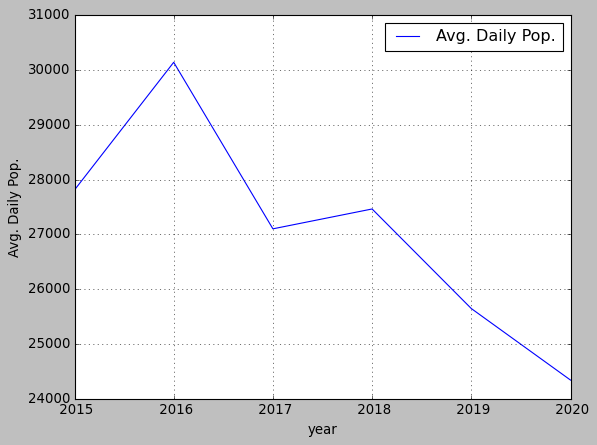

In [ ]:
# matplotlib plot
import matplotlib.pyplot as plt
df_year.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

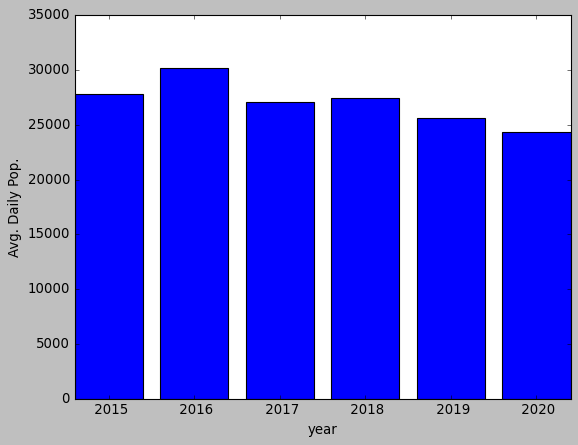

In [ ]:
# matplotlib barplot
import matplotlib.pyplot as plt
x = df_year['year']
y = df_year['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [ ]:
df_monthyear = df_1a.groupby(['year', 'month'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_monthyear.head(20)

,year,month,Avg. Daily Pop.
0,2015,01,2284
1,2015,02,2277
2,2015,03,2273
3,2015,04,2343
4,2015,05,2310
5,2015,06,2228
6,2015,07,2215
7,2015,08,2311
8,2015,09,2320
9,2015,10,2347


Text(0, 0.5, 'Avg. Daily Pop.')

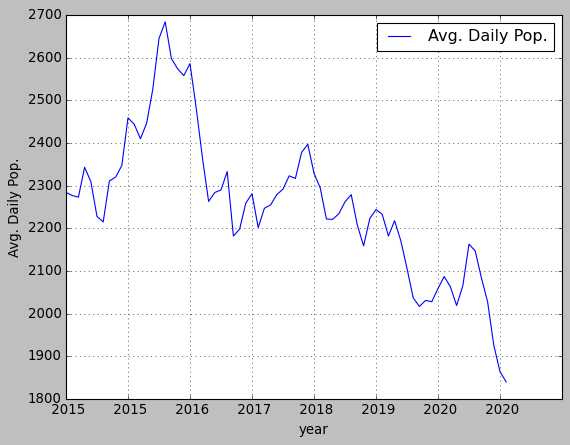

In [ ]:
# matplotlib plot
df_monthyear.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

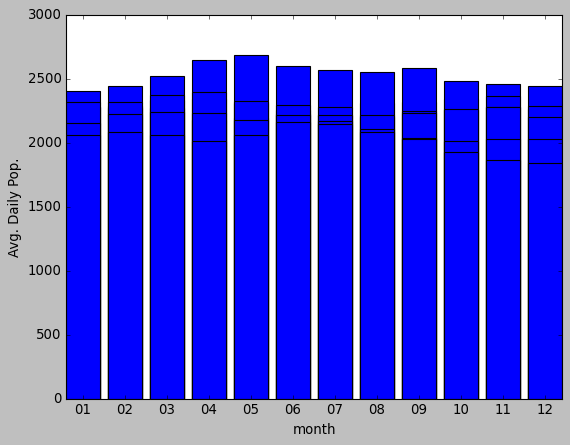

In [ ]:
x = df_monthyear['month']
y = df_monthyear['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [ ]:
df_dscc = df_1.groupby('DSCC Names').apply(lambda x: x.sort_values('year'))
df_dscc.head(20)

Date DSCC Abbr.  \
DSCC Names                                                 
Alternative Community Services 142 2015-11-01        ACS   
                               5   2015-09-01        ACS   
                               226 2015-03-01        ACS   
                               296 2015-04-01        ACS   
                               19  2015-01-01        ACS   
                               303 2015-05-01        ACS   
                               218 2015-06-01        ACS   
                               266 2015-07-01        ACS   
                               149 2015-02-01        ACS   
                               271 2015-10-01        ACS   
                               290 2015-08-01        ACS   
                               163 2015-12-01        ACS   
                               292 2016-12-01        ACS   
                               268 2016-09-01        ACS   
                               209 2016-01-01        ACS   
                               219 2016-05-01        ACS   
                               224 2016-04-01        ACS   
                               171 2016-08-01        ACS   
                               298 2016-10-01        ACS   
                               236 2016-03-01        ACS   

                                                        DSCC Names  \
DSCC Names                                                           
Alternative Community Services 142  Alternative Community Services   
                               5    Alternative Community Services   
                               226  Alternative Community Services   
                               296  Alternative Community Services   
                               19   Alternative Community Services   
                               303  Alternative Community Services   
                               218  Alternative Community Services   
                               266  Alternative Community Services   
                               149  Alternative Community Services   
                               271  Alternative Community Services   
                               290  Alternative Community Services   
                               163  Alternative Community Services   
                               292  Alternative Community Services   
                               268  Alternative Community Services   
                               209  Alternative Community Services   
                               219  Alternative Community Services   
                               224  Alternative Community Services   
                               171  Alternative Community Services   
                               298  Alternative Community Services   
                               236  Alternative Community Services   

                                                                             Category  \
DSCC Names                                                                              
Alternative Community Services 142  Criminal Justice Clients under Pre-Trial Services   
                               5    Criminal Justice Clients under Pre-Trial Services   
                               226  Criminal Justice Clients under Pre-Trial Services   
                               296  Criminal Justice Clients under Pre-Trial Services   
                               19   Criminal Justice Clients under Pre-Trial Services   
                               303  Criminal Justice Clients under Pre-Trial Services   
                               218  Criminal Justice Clients under Pre-Trial Services   
                               266  Criminal Justice Clients under Pre-Trial Services   
                               149  Criminal Justice Clients under Pre-Trial Services   
                               271  Criminal Justice Clients under Pre-Trial Services   
                               290  Criminal Justice Clients under Pre-Trial Services   
                      

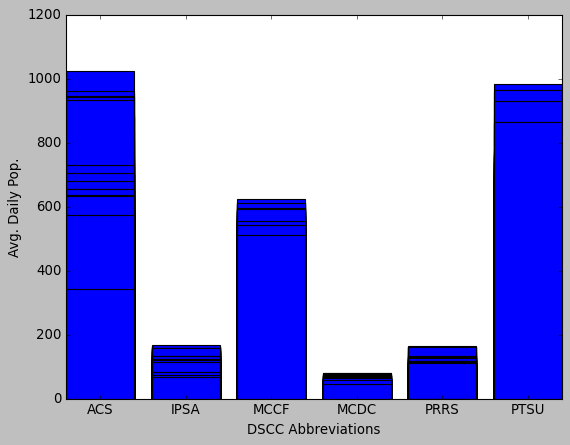

In [ ]:
x = df_dscc['DSCC Abbr.']
y = df_dscc['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('DSCC Abbreviations')
plt.ylabel('Avg. Daily Pop.')
plt.show()

ACS - Alternative Community Service
IPSA - Intervention Program for Substance Abusers
MCFF - Montgomery County Correctional Facility
MCDC - Montgomery County Detention Center
PRRS - Pre-Release and Re-Entry Services
PTSU - Pre-Trial Supervision Unit